# Group Members:


<font color='blue'>**PUT NAMES OF YOUR TEAM MEMBERS HERE**

*   Luca Franceschi - u199149
*   Jan Corcho - u188244

#Guide

In this practice we will study the minimization of quadratic functions using two iterative methods: gradient descent and conjugate gradient method. We will start working first with problems in $\mathbb R^2$, where we can compare visually the diffences between both algorithms.
In the second part of the lab we will apply the same algorithms but this time to an image editing problem using a technique called *Poisson editing*.

\\

For any doubts before and after the practice, you can contact your teacher:

Nneka Okolo - nnekamaureen.okolo@upf.edu

Pablo Arias - pablo.arias@upf.edu

Adriano Pastore - adriano.pastore@upf.edu

\\

**Deadlines**: See
[P101](https://calendar.google.com/calendar/embed?src=c_b679939a9db8a1d8cd9f01f62d373d173f76794e4137c40e793a8d2cb11708f8%40group.calendar.google.com&ctz=Europe%2FMadrid/),
[P102](https://calendar.google.com/calendar/embed?src=c_5a65338fe8c3ce7909e62bb6b572b1a61ff4ad3543b12f72468e1a16bca41bd0%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P201](https://calendar.google.com/calendar/embed?src=c_58aa336a0c5d0a38b13dd4a38071e7d8f9a18f4306ffeef2e48276087c339163%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P202](https://calendar.google.com/calendar/embed?src=c_dac1d492e1060f3cee35420a9c2ff0d345e89a002cc8c70fe74bf0b78bf99d37%40group.calendar.google.com&ctz=Europe%2FMadrid),


\\

**Submission instructions**

Complete the code and answer the questions below.

Export the notebook with the answers using the menu option File->Download .ipynb.

Rename exported notebook with the format **lastnameUid.ipynb** where lastname is the first surname of **Member 1** in the form and Uid is their UPF ID.

Submit your solution [here](https://forms.gle/AdYQwDEjAta1QaRY6) by the deadline. **Only one member needs to complete this step**.

You will receive an acknowledgement of receipt.

\\

**Grading**:

The evaluation is based on the report documenting your work (with figures), results, conclusions and the commented code together.

**Instructions for answering the questions.**

Questions are indicated in blue. Some questions require answers in the form of text, some others require completing code. See the examples below. *Please do not modify the notebook outside of these cells.*

<font color='blue'>**(QUESTION 42)** Based on what you know at this moment, answer these questions:
1. What are your favorite subjects?
2. What are your favourite hobbies?
</font>

<font color='red'>**ANSWER**</font>

1. I only like one subject: "Optimization Techniques."
1. I like writing equations $e^{i\pi} + 1 = 0$

<font color='blue'>**(QUESTION 43)** This is a coding question. There is no <font color='red'>**ANSWER**</font> cell. Instead, you should complete the code cell following the question. Typically, you'll find TODOs in the code indicating the places that you are expected to complete.
</font>

In [14]:
a = None     # TODO substitute the None by a nice number to print
print("The number a is {}".format(a))

The number a is None


# Quadratic functions basics

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
from IPython.display import clear_output, display

<font color='blue'>**(QUESTION 1)** Which of the following matrices are positive, semipositive or negative definite?</font>

$$\textbf D_1 =
\left[
\begin{array}{c c}
	-2 & 0\\
	0 & 4
\end{array}
\right],\quad \textbf D_2 =
\left[
\begin{array}{c c}
	0 &0 \\ 0& 2
\end{array}
\right], \quad \textbf D_3 =
\left[
\begin{array}{c c}
	0.5 & 0 \\ 0 & 1.5
\end{array}
\right].
$$

$$\textbf A_1 =
\left[
\begin{array}{c c}
	1 & -3 \\
	-3 & 1
\end{array}
\right],\quad \textbf A_2 =
\left[
\begin{array}{c c}
	1 &-1 \\ -1& 1
\end{array}
\right], \quad \textbf A_3 =
\left[
\begin{array}{c c}
	1 & -0.5 \\ -0.5 & 1
\end{array}
\right].
$$


<font color='red'> **ANSWER** </font>

The ones that have only positive eigenvalues are positive definite, the ones that have only negative eigenvalues are negative definite and the ones that have both positive and zero eigenvalues are considered semipositive.



In [16]:
# Define the matrices
D1 = np.array([[-2, 0], [0, 4]])
D2 = np.array([[0, 0], [0, 2]])
D3 = np.array([[0.5, 0], [0, 1.5]])
A1 = np.array([[1, -3], [-3, 1]])
A2 = np.array([[1, -1], [-1, 1]])
A3 = np.array([[1, -.5], [-.5, 1]])

In [17]:
# TODO: Build up the code to demonstrate which matrices are
#       positive definite and reasoning what you are implementing
matrices = {"D1": D1, "D2": D2, "D3": D3, "A1": A1, "A2": A2, "A3": A3}
for k, v in matrices.items():
    eval, evec = np.linalg.eigh(v)
    if np.all(eval > 0):
        print(f'Matrix {k} is positive definite')
    elif np.all(eval < 0):
        print(f'Matrix {k} is negative definite')
    elif np.all(eval >= 0):
        print(f'Matrix {k} is positive semidefinite')
    elif np.all(eval <= 0):
        print(f'Matrix {k} is negative semidefinite')
    else:
        print(f'Matrix {k} is indefinite')

Matrix D1 is indefinite
Matrix D2 is positive semidefinite
Matrix D3 is positive definite
Matrix A1 is indefinite
Matrix A2 is positive semidefinite
Matrix A3 is positive definite


The Python script `quad_fun_main` plots contours of the quadratic functions $g_i(\mathbf{x}) =\langle \mathbf{x}, \mathbf{D}_i\mathbf{x} \rangle$ and $f_i(\mathbf{x}) =\langle \mathbf{x}, \mathbf{A}_i\mathbf{x} \rangle$ for  the  above  matrices.


In [18]:
def quad_fun_main(matrices: dict):

    # Define the x1 and x2 axis and mesh to draw the level lines
    x1 = np.arange(start = -10, stop = 10.1, step = 0.1)
    x2 = np.arange(start = -10, stop = 10.1, step = 0.1)
    X, Y = np.meshgrid(x1, x2)

    # Calculate Z
    x = np.array([X.T.flatten(), Y.T.flatten()])
    results = {}
    for key, matrix in matrices.items():
        print("Procesing {}".format(key))
        aux = np.matmul(matrix, x)

        result = np.zeros((x1.shape[0], x2.shape[0]))
        for j in range(result.shape[0]):
            for i in range(result.shape[1]):
                result[i, j] = x[:, result.shape[0] * j + i].dot(aux[:, result.shape[0] * j + i])

        if key.startswith("D"):
            matrix_name = "G{}".format(key[-1])
        else:
            matrix_name = "F{}".format(key[-1])
        print("\tSaving as {}".format(matrix_name))
        results[matrix_name] = result

    # Plot the contours
    fig, axs = plt.subplots(nrows = int(len(results) / 3),
                        ncols = 3,
                        figsize = (14,8))
    for row in range(axs.shape[0]):
        for column in range(axs.shape[1]):
            matrix_name = list(results.keys())[axs.shape[0] * row + row + column]
            Z = results.get(matrix_name)
            axs[row, column].contour(X, Y, Z,
                                     corner_mask = False, levels = 150,
                                     linewidths=(1,), cmap = cm.coolwarm)
            axs[row, column].set_title(matrix_name)

    # Plot the surfaces
    fig = plt.figure(figsize=(16, 10))
    for row in range(axs.shape[0]):
        for column in range(axs.shape[1]):
            ax = fig.add_subplot(axs.shape[0], axs.shape[1], axs.shape[0] * row + row + column + 1, projection='3d')
            matrix_name = list(results.keys())[axs.shape[0] * row + row + column]
            Z = results.get(matrix_name)
            ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
            ax.set_title(matrix_name)

Procesing D1
	Saving as G1
Procesing D2
	Saving as G2
Procesing D3
	Saving as G3
Procesing A1
	Saving as F1
Procesing A2
	Saving as F2
Procesing A3
	Saving as F3


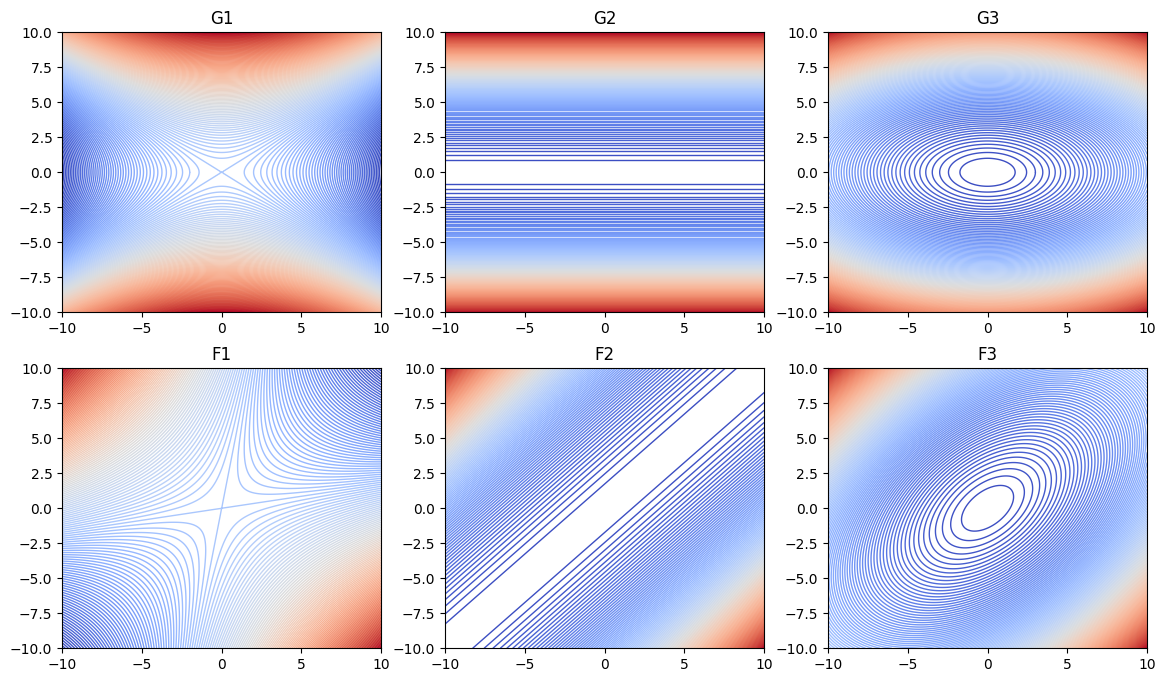

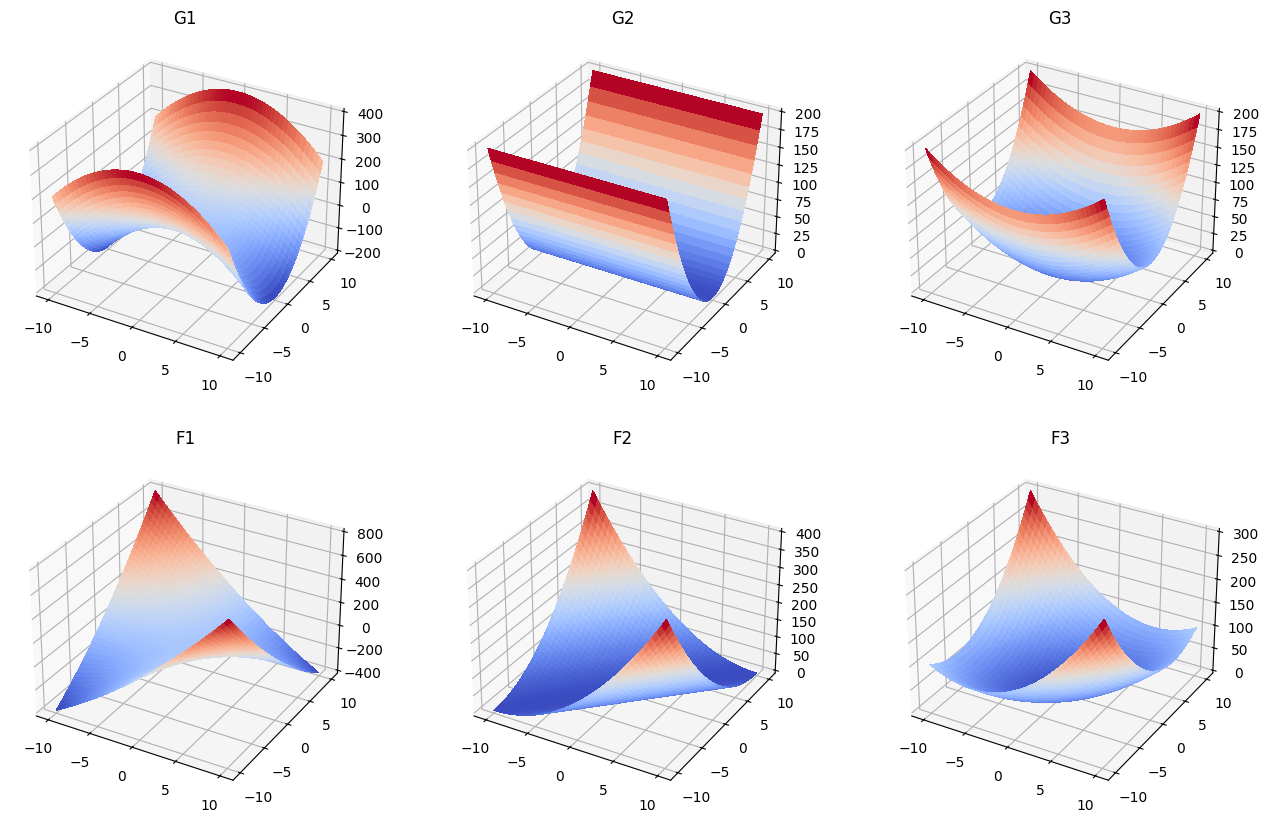

In [19]:
# Define the matrixes dictionary
matrixes = {"D1": D1, "D2": D2, "D3": D3, "A1": A1, "A2": A2, "A3": A3}

# Run the quad_fun_main
quad_fun_main(matrixes)

<font color='blue'>**(QUESTION
2)** Based on the contours of each function answer the following questions.</font>

<font color='blue'>- How  many  minima  does  each function have?    
<font color='blue'>- Which is the relation between the $g_i$ and $f_i$?

<font color='red'>**ANSWER**
</font>

Regarding the minima of the first 2 plots we can see that there are none, in line with the fact taht they are indefinite and semidefinite, while the last one is positive definite and has 1 minimum.
Gi and Fi are representations of same matrices but they have different eigen vectors, wich roatate the functions and we end up looking at the a different prespective.


# Minimization of quadratic functions


Let us suppose that we have a quadratic function $f(\textbf x) = \frac12\langle \textbf x,\textbf A \textbf x\rangle - \langle \textbf b,\textbf x\rangle$
where $\textbf x,\textbf b\in\mathbb R^n$ and $\textbf A$ is a $n\times n$, symmetric, positive
definite matrix. Let us compute its minimum as:

$$\nabla f(\textbf x) = \textbf A\textbf x - \textbf b = \textbf r(\textbf x),$$
where we have defined $\textbf r(\textbf x)$ as the residual of $\textbf x$.

This implies that minimizing $f$ is equivalent to solving a linear equation.
One could use direct methods such as Gaussian elimination or the pseudo-inverse
to solve this equation (we have already seen an example in the
regression problem of the
Assignment 1).
However, when the size of the problem grows, iterative methods are more
efficient to find an (approximate) solution. In this Assignment we will see two iterative methods:
the gradient descent method and the conjugate gradient.

## Gradient descent method


In the previous Assignment, we used the gradient descent method with a fixed step size.
This time we will use an adaptive step size. The step size is chosen as follows. At
iteration $k$ we have $\textbf x_k$. The next iterate is defined as $\textbf x_{k+1} =
\textbf x_k - \alpha \,\textbf r_k$. To simplify notation we have defined $\textbf r_k = \textbf r(\textbf x_k) = \nabla f(\textbf x_k)$. We will find the step
size $\alpha_k$ which minimizes the function $f$ restricted to the line $\textbf x_k - \alpha \textbf r_k$:

$$\alpha_k = \text{argmin}_\alpha f(\textbf x_k - \alpha\textbf r_k).$$

This way of computing the step is called *exact* line search. In this context,
$-\textbf r_k$ is called the *search direction*.
In the case of the gradient descent, the search direction is the negative gradient at point $\textbf x_k$, but as we will see soon, there are
better search directions. Before, let us see how we can compute the optimal step $\alpha_k$ for a generic
search direction $\textbf p\in\mathbb R^n$.


As you say in theory lessons, the minimum of the function $h(\alpha) = f(\textbf x_k -
\alpha \textbf p)$ is given by

$$\alpha_k = \displaystyle \frac{\langle \textbf p,(\textbf A\textbf x_k -
\textbf b)\rangle}{\langle \textbf p,\textbf A\textbf p\rangle} = \displaystyle\frac{\langle \textbf p,\textbf r_k\rangle}{\langle \textbf p,\textbf A\textbf p\rangle}.$$



<font color='blue'>**(QUESTION
3)** Complete the code of the function `gradient_descent`. Follow the comments in the code.</font>


In [20]:
def gradient_descent(callback,
                     b: np.matrix,
                     callback_params: dict,
                     x0: np.matrix,
                     max_iters: int,
                     tolerance: float,
                     fig = None,
                     ax = None):
    """
    Implementation of the gradient descent algorithm (a
    gradient descent scheme with optimal adaptive step size) for the minimization
    of quadratic problems

       f(x) = 1/2 x'Ax - bx.

    It uses function handles. It requires a handle to a Python function that implements the product of matrix A with x.

    :param callback: handle (pointer) to a Python function implementing the product with matrix A.
    :param b: vector b, can be in matrix form (MxN)
    :param callback_params: a dictionary with the callback function params
    :param x0: initial condition, same dimensions as b (MxN)
    :param max_iters: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when the norm of the gradient is below the tolerance)

    :return x: value found (MxN)
    :return fs: evolution of the target function (total_iters x 1 vector)
    """
    x = x0
    Ax = callback(x, **callback_params)
    r = Ax - b
    nr = np.linalg.norm(r)**2

    # Note: since the variables can be stored as matrices (for example, x is an image)
    #       we use np.multiply(x1, x2) to compute the dot products.

    # Allocate memory for vector of energy values of the iterates
    fs  = []


    # Start loop
    it = 0

    while (sqrt(nr) > tolerance) and (it < max_iters):
        # Increase iteration counter
        it = it + 1
        if it % 100 == 0:
            print("[{} of {}]\t-> |grad f(x)| = {}".format(it, max_iters, np.sqrt(nr)))

        # TODO: Compute quadratic energy f = .5 <Ax - b,x> - 0.5* <b,x>
        value = 0.5 * np.multiply(r, x).sum() - 0.5 * np.multiply(b, x).sum()
        fs.append(value)

        # 1. line search in r - compute time step alpha
        Ar = callback(r, **callback_params)
        alpha = nr / (np.multiply(r, Ar).sum())

        x_old = x # keep x_old - just for visualization

        #2. TODO: update point x
        x = x - alpha * r

        # TODO: compute new residual r = Ax - b
        Ax = callback(x, **callback_params)
        r = Ax - b
        nr = np.linalg.norm(r)**2

        # ----- plot current position! Just for visualization purposes -----
        if x.shape == (2, 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(x[0, 0], x[1, 0], marker = 'o', color = "k")
            ax.plot([x_old[0, 0], x[0, 0]], [x_old[1, 0], x[1, 0]], "-k")
            ax.set_aspect('equal', 'box')
            clear_output(wait=True)
            display(fig)
        elif x.shape[0] > 1 and x.shape[1] > 1:
            # if x is a matrix (an image) (visualization of denoising)
            if it % 10 == 0 or it == 1:
                if not ax:
                    fig, ax = plt.subplots(figsize = (12, 8))
                ax.imshow(x, cmap = "gray")
                clear_output(wait=True)
                display(fig)

    print("[{} of {}]\t-> |grad f(x)| = {}".format(it, max_iters, nr))
    return x, np.matrix(fs).T

## Conjugate gradient method

The conjugate gradient method works by building a basis of $\mathbb R^n$,
$\textbf d_1,\textbf d_2,\dots,\textbf d_n$ of conjugate vectors with respect to $\textbf A$. Two vectors
$\textbf v,\textbf w\in\mathbb R^n$ are conjugate if $\langle \textbf v, \textbf A \textbf w\rangle = 0$. It is a generalization of
orthogonality (two vectors are orthogonal if they are conjugate with respect to
the identity matrix!).

Suppose that at iteration $k$ we have an iterate $\textbf x_k$. The next iterate is defined as

$$\textbf x_{k+1} = \textbf x_k - \alpha_k \textbf d_k.$$

Here $-\textbf d_k$ is a descent direction and $\alpha_k$ is an adaptive time step,
computed by optimal line search in the direction $-\textbf d_k$

$$\alpha_k = \frac{\langle \textbf d_k,\textbf r_k\rangle}{\langle\textbf d_k,\textbf A\textbf d_k\rangle}.$$

The descent direction is computed as a linear combination of the current
gradient $\nabla f(\textbf x_k)  = \textbf r_k$ and the previous descent direction
$\textbf d_{k-1}$,

$$\textbf d_k = -\textbf r_k + \beta_k \textbf d_{k-1},$$

where $\beta_k$ is computed in such a way that the directions are a conjugate
basis of $\mathbb R^n$. It can be shown that $\beta_k$ is given by

$$\beta_k = \frac{\| \textbf r_k \|^2}{\|\textbf r_{k-1}\|^2}.$$

<font color='blue'>**(QUESTION
4)** Complete the code of the function `conjugate_gradient`. Follow the comments in the code.</font>


In [21]:
def conjugate_gradient(callback,
                       b: np.matrix,
                       callback_params: dict,
                       x0: np.matrix,
                       tolerance: float,
                       max_iters: int,
                       fig = None,
                       ax = None):
    """
    implementation of the conjugate gradient algorithm for the minimization of quadratic problems

       f(x) = 1/2 x'Ax - bx.

    It uses function handles. It requires a handle to a Python function that implements the product of matrix A with x.

    :param callback: handle (pointer) to a Python function implementing the product with matrix A.
    :param b: vector b, can be in matrix form (MxN)
    :param callback_params: dictionary containing the params for the callback functions
    :param x0: initial condition, same dimensions as b (MxN)
    :param max_iters: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when the norm of the gradient is below the tolerance)

    :return x: value found (MxN)
    :return fs: evolution of the target function (total_iters x 1 vector)
    """

    Ax = callback(x0, **callback_params)
    r = Ax - b
    nr = np.linalg.norm(r)**2
    d = -r

    # Note: since the variables can be stored as matrices (for example, x is an image)
    #       we use np.multiply(x1, x2) to compute the dot products.

    # Allocate memory for vector of energy values of the iterates
    fs  = []
    x = x0

    # Start loop
    it = 0

    while (sqrt(nr) > tolerance) and (it < max_iters):
        # Increase iteration counter
        it = it + 1
        if it % 10 == 0:
            print("[{} of {}]\t-> |grad f(x)| = {}".format(it, max_iters, nr))

        # Compute quadratic energy f = .5 <Ax - b,x> - 0.5* <b,x>
        fs.append(0.5 * np.multiply(r, x).sum() - 0.5 * np.multiply(b, x).sum())

        # TODO: line search in d - compute time step alpha
        Ad = callback(d, **callback_params)
        alpha = np.multiply(d, r).sum() / np.multiply(d, Ad).sum()

        x_old = x # keep x_old - just for visualization

        # TODO: update point x
        x = x - alpha * d

        # compute new residual r = Ax - b
        Ax = callback(x, **callback_params)
        r = Ax - b
        nr_old = nr                       # inner product of the old residual
        nr = np.linalg.norm(r)**2

        # A-orthogonalization of r (Gram-Schmidt)
        # new search direction d is a linear combination of r and previous d
        # chosen so that it is A-orthogonal with the previous search directions
        beta = nr / nr_old
        d = -r + beta * d

        # ----- plot current position! Just for visualization purposes -----
        if x.shape == (2, 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(x[0, 0], x[1, 0], marker = 'o', color = "r")
            ax.plot([x_old[0, 0], x[0, 0]], [x_old[1, 0], x[1, 0]], "-r")
            ax.set_aspect('equal', 'box')
            clear_output(wait=True)
            display(fig)
        elif x.shape[0] > 1 and x.shape[1] > 1:
            # if x is a matrix (an image) (visualization of denoising)
            if it % 10 == 0:
                if not ax:
                    fig, ax = plt.subplots(figsize = (12, 8))
                ax.imshow(x, cmap = "gray")
                clear_output(wait=True)
                display(fig)

    print("[{} of {}]\t-> |grad f(x)| = {}".format(it, max_iters, nr))
    return x, np.matrix(fs).T

<font color='blue'>**(QUESTION
5)** We start by visualizing the evolution of the gradient descent for a trivial problem in $\mathbb R^2$.
Run the following cell and answer these questions:</font>
<font color='blue'>
1. How many iterations does the gradient descent need to converge? Why?</font><br>
<font color='blue'>
1. How many iterations would the conjugate gradient need to converge? Why?</font>

<font color='red'>**ANSWER**</font>

1. In this case it takes gradient descent 1 iteration to converge. Since the 
2. The conjugate gradient also converges in 1 iteration.


In [27]:
# we define the callback function, simply implementing A*x
def multiply_ax(x):
    return A * x

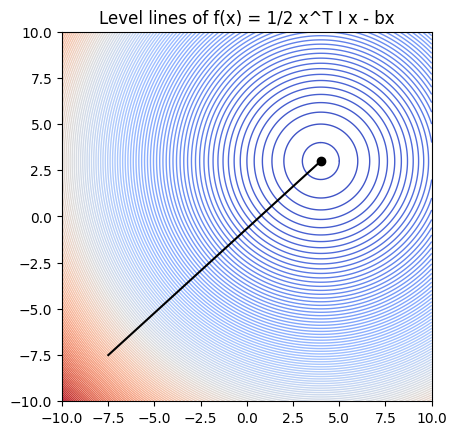

[1 of 1000]	-> |grad f(x)| = 6.310887241768096e-30


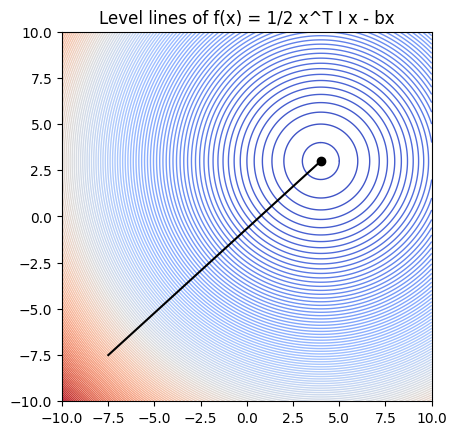

In [29]:
# --------------------------------------------------------------------------------------
# create grid to plot contours of quadratic function -----------------------------------
# --------------------------------------------------------------------------------------
x1 = np.arange(start = -10, stop = 10.1, step = 0.1)
x2 = np.arange(start = -10, stop = 10.1, step = 0.1)
X, Y = np.meshgrid(x1, x2)

# matrix containing all grid points as columns
x = np.matrix([X.T.flatten(), Y.T.flatten()])

# --------------------------------------------------------------------------------------
# start with a trivial example: a quadratic function based on the identity matrix ------
# --------------------------------------------------------------------------------------
A = np.matrix([[1, 0], [0, 1]])
b = np.matrix([[4], [3]])

# evaluate function for all points in x
Ax = A * x
bx = b.T * x

result = np.zeros((x1.shape[0], x2.shape[0]))
for j in range(result.shape[0]):
    for i in range(result.shape[1]):
        result[i, j] = 0.5 * x[:, result.shape[0] * j + i].T * Ax[:, result.shape[0] * j + i] - bx[:, result.shape[0] * j + i]

# Plot the contour of f
fig = plt.figure()
plt.contour(X, Y, result,
            corner_mask = False, levels = 150,
            linewidths=(1,), cmap = cm.coolwarm)
plt.title('Level lines of f(x) = 1/2 x^T I x - bx')

# run gradient descent
tolerance = 1e-5
max_iters = 1000
x1 = gradient_descent(callback = multiply_ax,
                      b = b,
                      callback_params = {},
                      x0 = np.matrix([[-7.5], [-7.5]]),
                      tolerance = tolerance,
                      max_iters = max_iters,
                      fig = fig,
                      ax = plt.gca())

<font color='blue'>**(QUESTION
6)** Same as before, but for a more interesting quadratic function in $\mathbb R^2$.
Run the following cell and answer these questions:</font>
<font color='blue'>
1. How many iterations does the gradient descent need to converge?</font></br>
<font color='blue'>
1. Does the performance of the gradient descent depend on the position of the initial condition?</font></br>
<font color='blue'>
1. Are there any initial conditions for which the gradient descent converges in one iteration?</font></br>
<font color='blue'>
1. Which is the angle between consecutive descent directions for the gradient descent? Why?</font></br>
<font color='blue'>
1. How many iterations would the conjugate gradient need to converge? Why?</font>

<font color='red'>**ANSWER**
</font>
1. Depends on the starting point. As an example on (5,-5) it converges in 101 iterations.
2. As we said before the performance of the gradient descent depends greatly on the initial conditions, especially when there multiple local minima. 
3. Yes multiple. An example of these would be the point (-7.5, 2.5)
4. The angle is of 90 degrees
5. As with the gradient descent the conjugate gradient also depends somewhat on the initial conditions, but we know that at a maximum it will converge in n iterations, being n the number of dimensions. At point (5,-5) it converges in n, 2.

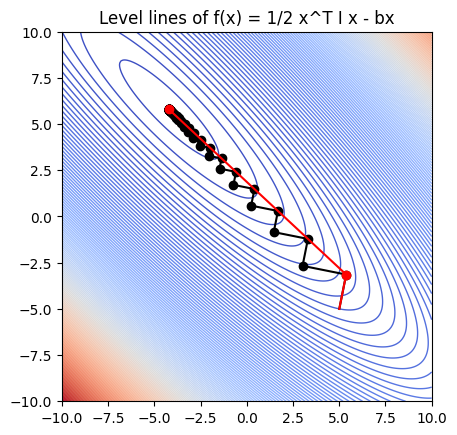

[2 of 100]	-> |grad f(x)| = 3.94430452610506e-30


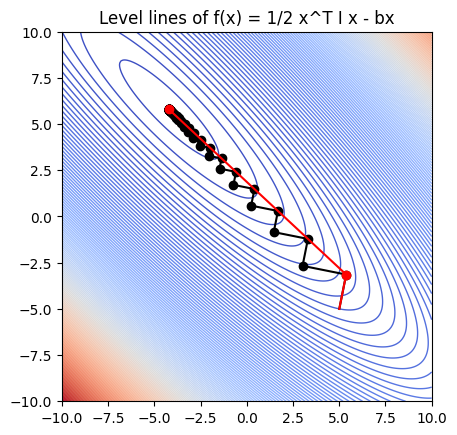

In [39]:
# --------------------------------------------------------------------------------------
# create grid to plot contours of quadratic function -----------------------------------
# --------------------------------------------------------------------------------------
x1 = np.arange(start = -10, stop = 10.1, step = 0.1)
x2 = np.arange(start = -10, stop = 10.1, step = 0.1)
X, Y = np.meshgrid(x1, x2)

# matrix containing all grid points as columns
x = np.matrix([X.T.flatten(), Y.T.flatten()])

# --------------------------------------------------------------------------------------
# a more general quadratic function ----------------------------------------------------
# --------------------------------------------------------------------------------------
A = np.matrix([[1, .9], [.9, 1]])
b = np.matrix([[1], [2]])

# evaluate function for all points in x
Ax = A * x
bx = b.T * x

result = np.zeros((x1.shape[0], x2.shape[0]))
for j in range(result.shape[0]):
    for i in range(result.shape[1]):
        result[i, j] = 0.5 * x[:, result.shape[0] * j + i].T * Ax[:, result.shape[0] * j + i] - bx[:, result.shape[0] * j + i]

# Plot the contour of f
fig = plt.figure()
ax = plt.gca()
plt.contour(X, Y, result,
            corner_mask = False, levels = 150,
            linewidths=(1,), cmap = cm.coolwarm)
plt.title('Level lines of f(x) = 1/2 x^T I x - bx')

# run gradient descent
tolerance = 0.00001
max_iters = 1000
x1 = gradient_descent(callback = multiply_ax,
                      b = b,
                      callback_params = {},
                      x0 = np.matrix([[5], [-5]]),  # TRY several starting points
                      tolerance = tolerance,
                      max_iters = max_iters,
                      fig = fig,
                      ax = ax)

# run conjugate gradient
tolerance = 0.00001
max_iters = 100
x1 = conjugate_gradient(callback = multiply_ax,
                        b = b,
                        callback_params = {},
                        x0 = np.matrix([[5], [-5]]),  # TRY several starting points
                        tolerance = tolerance,
                        max_iters = max_iters,
                        fig = fig,
                        ax = ax)

<font color='blue'>**(QUESTION
7)** This time we minimize a quadratic function in $\mathbb R^{100}$.
Run the following cell and answer these questions:</font>
<font color='blue'>
1. Which iterative method converges faster?
</font></br>
<font color='blue'>
1. Which is the order of convergence of the gradient descent?
</font></br>
<font color='blue'>
1. Why is the logarithmic plot of the error for the gradient descent linear?
</font></br>
<font color='blue'>
1. Which is the maximum number of iterations needed for the conjugate gradient?</font></br>

<font color='red'>**ANSWER**
</font>

1. The conjugate gradient method converges in 54 iterations while the gradient descent converges in 4821 iterations.
2. The order of convergence of the gradient descent is linear, since the error decreases by a fixed value each iteration.

The Gradient Descent (GD) method typically exhibits **linear convergence** when minimizing quadratic functions. This means that the error $ e_k $ at iteration $ k $ decreases by a constant factor in each iteration.

Mathematically, this can be expressed as:

$ e_{k+1} \leq \rho e_k $

where:
- $( e_k = \|x_k - x^*\| )$ is the error at iteration $( k )$,
- $( x_k )$ is the current iterate,
- $( x^* $) is the optimal solution,
- $( \rho )$ is a constant (with ( 0 < $ \rho $ < 1 )).

3. The logarithmic plot of the error is linear.

If the error \( e_k \) decreases linearly, we can express it as:

$ e_k$ = $C$ $ \rho^k $

for some constant $( C $). Taking the logarithm of both sides gives:

$[ log(e_k) $ $=$ $\log(C)$ + $k$ $\log(\rho$) \]

This is a linear equation in terms of $( k $). Hence, when we plot $( \log(e_k) $) against $( k $), we get a straight line.


4. As we have said in pervious exercises the number of iterations needed for the conjugate gradient to converge is at most n, being n the number of dimensions of our problem. In this case since the quadratic function we want to minimize is in R 100, the maximum number of iterations it would take is at most 100.

[100 of 1000000]	-> |grad f(x)| = 0.1662818672306742
[200 of 1000000]	-> |grad f(x)| = 0.12989899319539067
[300 of 1000000]	-> |grad f(x)| = 0.10554803106975857
[400 of 1000000]	-> |grad f(x)| = 0.08597422002986847
[500 of 1000000]	-> |grad f(x)| = 0.0700416203927372
[600 of 1000000]	-> |grad f(x)| = 0.05706222161016673
[700 of 1000000]	-> |grad f(x)| = 0.04648806439383983
[800 of 1000000]	-> |grad f(x)| = 0.037873397956048986
[900 of 1000000]	-> |grad f(x)| = 0.030855108630625797


[1000 of 1000000]	-> |grad f(x)| = 0.025137372936346433
[1100 of 1000000]	-> |grad f(x)| = 0.02047918630633092
[1200 of 1000000]	-> |grad f(x)| = 0.016684204544038406
[1300 of 1000000]	-> |grad f(x)| = 0.01359246784044596
[1400 of 1000000]	-> |grad f(x)| = 0.011073658411817773
[1500 of 1000000]	-> |grad f(x)| = 0.009021607559495213
[1600 of 1000000]	-> |grad f(x)| = 0.007349820622134794
[1700 of 1000000]	-> |grad f(x)| = 0.005987831195409201
[1800 of 1000000]	-> |grad f(x)| = 0.004878230948480765
[1900 of 1000000]	-> |grad f(x)| = 0.003974249842749968
[2000 of 1000000]	-> |grad f(x)| = 0.003237784758320192
[2100 of 1000000]	-> |grad f(x)| = 0.0026377934342310372
[2200 of 1000000]	-> |grad f(x)| = 0.002148986026252538
[2300 of 1000000]	-> |grad f(x)| = 0.0017507591311459135
[2400 of 1000000]	-> |grad f(x)| = 0.0014263273459389967
[2500 of 1000000]	-> |grad f(x)| = 0.0011620157573882942
[2600 of 1000000]	-> |grad f(x)| = 0.0009466835395468264
[2700 of 1000000]	-> |grad f(x)| = 0.00077125

/tmp/ipykernel_38337/1689480223.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = -0.5 * b.T * np.linalg.lstsq(A, b)[0]


Text(0.5, 1.0, 'logarithmic plot of f(x_i) - f^*')

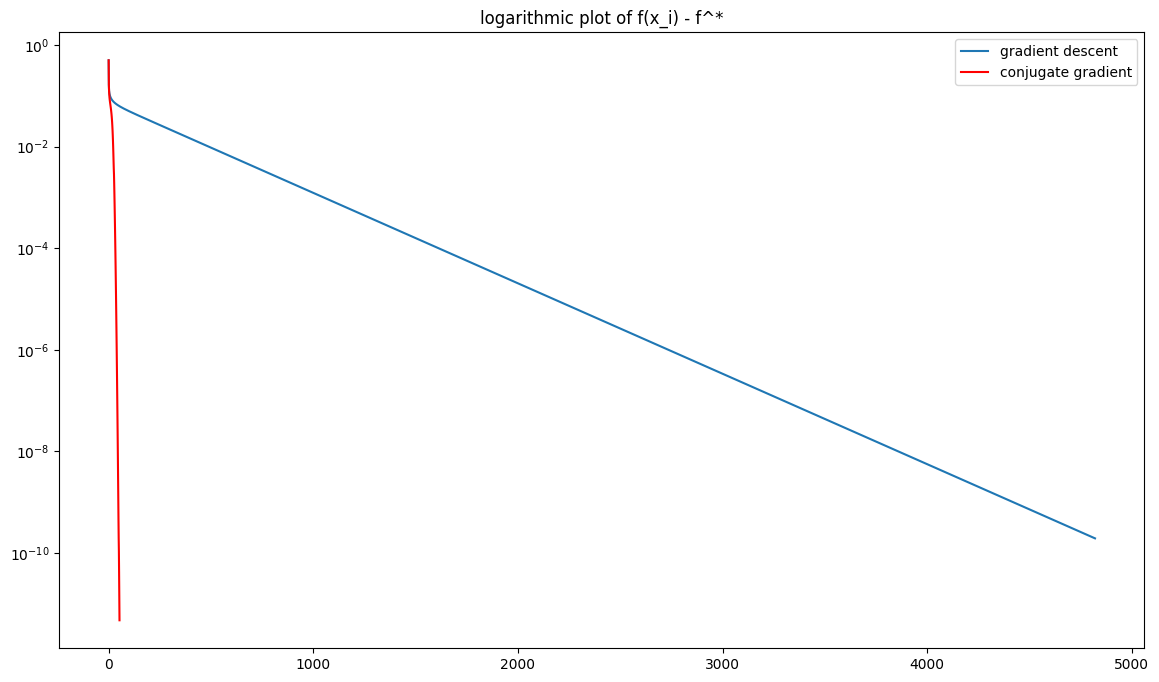

In [41]:
# Define the problem matrix. Is it symmetric? Is it positive definite?
A = np.matrix(np.ones(shape = (100, 100)) + np.diag(np.arange(0, 100)))
b = np.matrix(np.ones(shape = (100, 1)))

# run gradient descent
tolerance = 10 ** -5
max_iters = 10 ** 6
x1, fs_1 = gradient_descent(callback = multiply_ax,
                      b = b,
                      callback_params = {},
                      x0 = np.zeros_like(b),  # TRY several starting points
                      tolerance = tolerance,
                      max_iters = max_iters)

# run conjugate gradient 
tolerance = 10 ** -5
max_iters = 100
x2, fs_2 = conjugate_gradient(callback = multiply_ax,
                        b = b,
                        callback_params = {},
                        x0 = np.zeros_like(b),  # TRY several starting points
                        tolerance = tolerance,
                        max_iters = max_iters)

m = -0.5 * b.T * np.linalg.lstsq(A, b)[0]
m = m[0,0]

fig, ax = plt.subplots(figsize = (14, 8))
ax.semilogy(fs_1 - m)
ax.semilogy(fs_2 - m, 'r')
ax.legend(['gradient descent', 'conjugate gradient'])
ax.set_title('logarithmic plot of f(x_i) - f^*') 

# Poisson image editing

<img src="https://github.com/Muchay/OptTechCourse_Aux/blob/main/Lab3/images/lisa-ginevra-compositing-gray-levels.png?raw=true"/>

An image editing problem. We would like to swap the faces of Ginevra de' Benci (left) and Lisa Gherardini. The image on the right shows the result of composing images by editing the gray levels using the binary mask $m$ (3rd image from the left). The result shows a discontinuity of the gray levels along the boundary of the mask. In the next cells we're going to solve this problem using a technique called *Poisson editing*.

In [26]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/upf-optimization-techniques/Labs_2024/Lab3/jupyter"

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# By now, you should have the folder "OptTechCourse_Aux" in your drive
# Create source path
source = "/content/drive/MyDrive/OptTechCourse_Aux/Lab3/"

In [ ]:
# Install if required
# !python -m pip install opencv-python

In [ ]:
import numpy as np
from PIL import Image
import os
import cv2 as cv
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import clear_output, display

First we load the images. For better looking results, we will also blur them a bit with a Gaussian filter. Learn more about Gaussian blurring [here](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html).

In [ ]:
# Define the images directory
images_dir = os.path.abspath(source + "images")

# Read all the required images
ginevra = Image.open(os.path.join(images_dir, "ginevra.png"))
lisa = Image.open(os.path.join(images_dir, "lisa.png"))
mask = Image.open(os.path.join(images_dir, "mask.png"))

# Convert all the images to 2D
u1 = np.array(ginevra, dtype = float)[:, :, 0]
u2 = np.array(lisa, dtype = float)[:, :, 0]
mask = np.array(mask, dtype = float) / 255

# Apply Gaussian blurring
u1 = cv.GaussianBlur(src = u1, ksize = (9, 9), sigmaX = 2, borderType = cv.BORDER_REFLECT)
u2 = cv.GaussianBlur(src = u2, ksize = (11, 11), sigmaX = 4, borderType = cv.BORDER_REFLECT)

# Show all the images
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 8))
ax1.imshow(u1, cmap = "gray")
ax1.set_title("Ginevra")
ax2.imshow(u2, cmap = "gray")
ax2.set_title("Lisa")
ax3.imshow(mask, cmap = "gray")
ax3.set_title("Mask")
plt.show()

## A quadratic energy for image ediding

As an application of the conjugate gradient method for minimizing quadratic
energies, we will present a method for image edition called Poisson editing.
Poisson editing is based on editing the gradient of an image instead of working
directly with the gray levels (or with the colors). As we will see, this
simplifies many things for certain editing tasks.

We will focus on the following problem: we have two famous portraits by
Leonardo Da Vinci, and we would like to interchange the faces of Ginevra de'
Benci and Lisa Gherardini. Both portraits have been aligned and scaled, so that
the faces are the same size and are in the same position of the image. There is
also a mask, which selects the part of the image we want to interchange.

Let $u_1,u_2:\Omega\rightarrow \mathbb R$ and $m:\Omega\rightarrow \{0,1\}$ be both
images, and the binary mask. $\Omega$ is a discrete rectangular 2D grid, the
positions of the image pixels: $\Omega = \{1,\dots,M\}\times\{1,\dots,N\}$ ($M$
columns and $N$ rows). Say we want the face of $u_1$ in $u_2.$ Let us call $u$
the resulting image.


**Editing directly the gray levels**

The simplest thing to try is to define $u$ as follows:

$$u_{ij} = m_{ij}u_{1,ij} + (1 - m_{ij})u_{2,ij}, \quad \text{ for
}\quad(i,j)\in\Omega.$$

This gives the result shown in the figure above. Notice that the editing
region is clearly visible! The reason is that one of the images is darker than
the other, and this creates a discontinuity with the shape of the mask.



<font color='blue'>**(QUESTION
8)** Complete the following code cell
to implement the crude composition of gray levels.</font>

In [ ]:
def composite_gray_levels(u1: np.array,
                          u2: np.array,
                          mask: np.array):
    """
    Creates a composite image by copying a region of image 1 into image 2.
    The region is determined as the pixels where the binary mask is 1.

    :param u1: grayscale image 1 (MxN)
    :param u2: grayscale image 2 (MxN)
    :param mask: binary image 2 (MxN)
    """

    # TODO compute composite image
    ucomp = np.multiply(mask, u1) + np.multiply(1-mask, u2)

    return ucomp

In [ ]:
# Show the composed image
ucomp = composite_gray_levels(u1,u2,mask)
plt.figure(figsize = (12, 8))
plt.imshow(ucomp, cmap = "gray")

**Editing the gradients**

A better alternative is to perform the editing by copying *diferences of gray levels* instead of gray levels. Thus, first we will compute the *finite diffence gradient* of both
images,

$$\nabla^+ u_{1,ij} = \left[
\begin{array}{c}
	\nabla^+_i u_{1,ij}\\
	\nabla^+_j u_{1,ij}\\
\end{array}
\right]\quad\quad\text{ and }\quad\quad
\nabla^+ u_{2,ij} = \left[
\begin{array}{c}
	\nabla^+_i u_{2,ij}\\
	\nabla^+_j u_{2,ij}\\
\end{array}
\right]
$$
for $i=1,2,\dots M,j=1,2,\dots N.$
Here $\nabla^+_i$ and $\nabla^+_j$ refer to the forward differences partial
derivatives in the direction of $i$ (rows) and $j$ (columns), as we defined them
in the previous assignment.

We define a new vector-valued image by composing these gradients as follows:
when $m_{ij} = 0$ (non-face pixel) we use the gradient of $u_2$, and when
$m_{ij} = 1$ (face pixel) we use the gradient of $u_1$. We store this in a new
vector valued image $v:\Omega\rightarrow \mathbb R^2$:
\begin{align*}
v_{ij} &= m_{ij}\nabla^+ u_{1,ij} + (1-m_{ij})\nabla^+ u_{2,ij}\\
&=\left[\begin{array}{c}
	m_{ij}\nabla^+_i u_{1,ij} + (1-m_{ij})\nabla^+_i u_{2,ij}\\
	m_{ij}\nabla^+_j u_{1,ij} + (1-m_{ij})\nabla^+_j u_{2,ij}\\
\end{array}\right]\\
&=\left[\begin{array}{c}
	v_{1,ij}\\
	v_{2,ij}\\
\end{array}\right]
\end{align*}
for $(i,j)\in\Omega$.

For computing the forward difference gradient we will use `im_fwd_gradient` from previous assignments.

In [ ]:
def im_fwd_gradient(image: np.ndarray):
    """
    Discrete gradient of an image using forward differences, with
    homogeneous Neuman boundary conditions.

    :param image: an MxN image

    :return grad_i: partial derivative in the i direction (vertical)
    :return grad_j: partial derivative in the j direction (horizontal)
    """

    # TODO: Calculate both gradients
    #       Check the Neuman boundary conditions
    grad_i = np.concatenate((np.diff(image, 1, 0), np.zeros((1, image.shape[1]))), axis=0)
    grad_j = np.concatenate((np.diff(image, 1, 1), np.zeros((image.shape[0], 1))), axis=1)

    return grad_i, grad_j

<font color='blue'>**(QUESTION
9)** Complete the following code cell
to compute the gradient composition $v$.</font>

In [ ]:
def composite_gradients(u1: np.array,
                        u2: np.array,
                        mask: np.array):
    """
    Creates a vector field v by combining the forward gradient of u1 and u2.
    For pixels where the mask is 1 v coincides with the gradient of u1, and when
    mask is 0 v coincidies with the gradient of u2.

    :param u1: grayscale image 1 (MxN)
    :param u2: grayscale image 2 (MxN)
    :param mask: binary image 2 (MxN)

    :return vi: composition of i components of gradients (vertical component)
    :return vj: composition of j components of gradients (horizontal component)
    """

    # TODO: Compute the gradients of u1 and u2, and define a new gradient [vi,vj]
    # which corresponds to the gradient of u1 when mask = 1, and the gradient
    # of u2 when mask = 0

    u1_row_grad, u1_col_grad = im_fwd_gradient(u1)
    u2_row_grad, u2_col_grad = im_fwd_gradient(u2)

    vi = np.multiply(mask, u1_row_grad) + np.multiply(1-mask, u2_row_grad)
    vj = np.multiply(mask, u1_col_grad) + np.multiply(1-mask, u2_col_grad)

    return vi, vj

In [ ]:
vi, vj = composite_gradients(u1, u2, mask)

plt.figure(figsize = (24, 8))
plt.subplot(1,2,1)
plt.imshow(vi, cmap = "gray")
plt.subplot(1,2,2)
plt.imshow(vj, cmap = "gray")

Now we have to find an image $u$ whose gradient coincides (or is similar) with $v$:
$\nabla^+ u \approx v$. In addition, the image should be $u_2$ outside the face (when
$m_{ij} = 0$). We will find $u$ by solving a quadratic energy which imposes these too conditions as follows:

$$E(u) = \overbrace{\dfrac{1}{2}\sum_{i = 1}^N\sum_{j = 1}^M |\nabla^+u_{ij} - v_{ij}|_{\mathbb R^2}^2}^{\text{gradients similar to $v$}} +
\overbrace{\dfrac{1}{2}\sum_{i = 1}^N\sum_{j = 1}^M \beta_{ij}(u_{ij} - u_{2,ij})^2}^{\text{$u$ is $u_{2}$ outside the mask}}$$

where $\beta:\Omega\rightarrow \mathbb R$ is a coefficients image which controls the
attachment to $u_{2,ij}$. We will use $\beta_{ij} = \beta_0 (1- m_{ij})$, where
$\beta_0 \in \mathbb R$ is a constant. This means that $\beta_{ij}$ is zero on
the face region, only acting outside the face. Recall that $|\cdot|$ denotes
the Euclidean norm in $\mathbb R^2$.

Similar to what we did for denoising, we can express the energy in matrix
notation, using our vector representation of images and discrete gradients:

$$
	E(u) = \frac12\langle \nabla^+ u - v, \nabla^+ u - v\rangle_{\mathcal Y} + \frac12\langle B (u
	- u_2), u - u_2\rangle_{\mathcal X}.
$$

where $B$ is a $MN\times MN$ diagonal matrix, which in its diagonal has the
image $\beta_{ij}$. The rest of the notation is as in the previous assignment,
$\mathcal X= \mathbb R^{MN}$ denotes the space of gray-scale images, and
$\mathcal Y = \mathbb R^{2MN}$ denotes the space of vector-valued images.
$\langle\cdot,\cdot\rangle_{\mathcal X}$ is the scalar product in $\mathbb
R^{NM}$ and $\langle\cdot,\cdot\rangle_{\mathcal Y}$ is the scalar product in
$\mathbb R^{2NM}$.


**Conjugate gradient set up**

We have expressed our editing problem as a quadratic energy, however we still need a bit of work to do if we want to apply our conjugated gradient code. We need to rewrite $E$ in a more familiar way:

$$E(u) = \frac12\langle u,\textbf A u\rangle - \langle b, u\rangle + c,$$

where $c\in\mathbb R$ is a constant, $b\in\mathcal X$ and $\textbf A$ is a $MN\times MN$, symmetric, positive
definite matrix.

We can do this simply by manipulating the terms of the energy $E$, as follows:
\begin{align*}
E(u) =& \dfrac{1}{2}\langle\nabla^+u - v, \nabla^+u - v\rangle_{Y} +
\dfrac{1}{2}\langle B(u - u_{2}), u - u_{2}\rangle_{X}\\
% =& \dfrac{1}{2}(\langle\nabla^+u, \nabla^+u\rangle_Y - \langle v, \nabla^+u\rangle_y - \langle \nabla^+u ,v\rangle_Y + \langle v ,v\rangle_Y)\\
%& + \dfrac{1}{2}\left(\langle Bu , u\rangle_{X} -\langle Bu, u_{2}\rangle_{X} - \langle Bu_{2}, u \rangle_{X} + \langle Bu_{2}, u_{2}\rangle_{X}\right)\\
% =& \dfrac{1}{2}(\langle-\text{div}^-\nabla^+u, u\rangle_X + 2\langle \text{div}^-v, u\rangle_X + \langle v ,v\rangle_Y)\\
%& + \dfrac{1}{2}\left(\langle Bu , u\rangle_{X} -2\langle Bu_{2}, u\rangle_{X}  + \langle Bu_{2}, u_{2}\rangle_{X}\right)\\
=& \dfrac{1}{2}\langle\underbrace{(B-\text{div}^-\nabla^+)}_{\textbf A}u, u\rangle_X - \langle \underbrace{Bu_2 - \text{div}^-v }_{\textbf b}, u\rangle_X + \underbrace{\dfrac12 \langle v ,v\rangle_Y
 + \dfrac12\langle Bu_{2}, u_{2}\rangle_{X}}_{c}
\end{align*}

We have now identified the matrix $\textbf A$ and vector $\mathbf b$ of our quadratic energy. To minimize the energy using the conjugate gradient the only thing left is implementing the callback function that computes $\mathbf Au$ and computing the vector $\mathbf b$.

We will need the `im_bwd_divergence` function from previous assignments that computes the action of $\text{div}^-$. Recall that $\text{div}^- = - (\nabla^+)^T$.

In [ ]:
def im_bwd_divergence(vector_image_i: np.ndarray,
                      vector_image_j: np.ndarray):
    """
    Discrete divergence of a vector image using backward differences.
    This is the negative transpose of the im_fwd_gradient

    :param vector_image_i: MxN image of vectical vector components
    :param vector_image_j: MxN image of horizontal vector components

    :return divg: backwards divergence of vector_image
    """
    vector_image_i[-1] = 0
    vector_image_j[:,-1] = 0

    # TODO: Backwards i partial derivative of vector_image_i
    divg_i = np.concatenate((np.zeros((1, vector_image_i.shape[1])),
                             vector_image_i), axis=0)

    divg_i = np.diff(divg_i, 1, 0)
    # TODO: Backwards j partial derivative of vector_image_j
    divg_j = np.concatenate((np.zeros((vector_image_j.shape[0], 1)),
                             vector_image_j), axis=1)

    divg_j = np.diff(divg_j, 1, 1)

    return divg_i + divg_j

<font color='blue'>**(QUESTION
10)** Complete the following code cell. Given an image $u$ and a mask $\beta$, the function `poisson_linear_operator` receives $u$ and $\beta$ as input and returns
$$\textbf Au = (B - \text{div}^-\nabla^+)u = \beta u - \text{div}^-\nabla^+u.$$</font>

In [ ]:
def poisson_linear_operator(u: np.array, beta: np.array):
    """
    Implements the action of the matrix A in the quadratic energy associated
    to the Poisson editing problem.

    :param u: an image (MxN)
    :param beta: the mask image (MxN)

    :return Au: matrix A applied to image
    """

    # TODO complete function

    tmp1, tmp2 = im_fwd_gradient(u)
    return np.multiply(beta, u) - im_bwd_divergence(tmp1, tmp2)

<font color='blue'>**(QUESTION
11)** The following function puts everything together. Complete it by adding the computation of the vector $\textbf b$.</font>

In [ ]:
def poisson_blending(u1: np.array,
                     u2: np.array,
                     mask: np.array):
    """
    Uses Poisson editing to blend a region of image 1 into image 2.
    The region is determined as the pixels where the binary mask is 1.

    :param u1: grayscale image 1 (MxN)
    :param u2: grayscale image 2 (MxN)
    :param mask: binary image 2 (MxN)

    :return upsn: Poisson blended image (MxN)
    :return fs: array with the Poisson blending energy for each iteration
    """

    # Define beta_0 and calculate beta
    beta_0 = 20                           # TRY CHANGING
    beta = beta_0 * (1 - mask)

    # Calculate the right hand term with boundary data
    vi, vj = composite_gradients(u1, u2, mask)
    b = (-1) * im_bwd_divergence(vi, vj) + beta * u2

    # Define the parameters to be used when calculating the conjugate gradient
    initial_condition = np.zeros_like(u1)  # TRY CHANGING
    tolerance = 1                          # TRY CHANGING
    max_iters = 1000                       # TRY CHANGING
    upsn, fs = conjugate_gradient(callback = poisson_linear_operator,
                                  b = b,
                                  callback_params = {"beta": beta},
                                  x0 = initial_condition,
                                  tolerance = tolerance,
                                  max_iters = max_iters)

    return upsn, fs

<font color='blue'>**(QUESTION 12)** Run the Poisson blending code changing different parameters (see the "TRY CHANGING" comments in the code).
1. Try using different initial conditions (without changing `tolerance` and `max_iters`. Does the final result depend on the initial value?
1. Now let us set `max_iters = 10` and try a couple of different initial conditions`. Does now the final result depend on the initial value? Are 10 iterations enough for the algorithm to converge?
1. What is the impact of the tolerance? What happens if the tolerance is too large? What if it is too small?
</font>

<font color='red'>**ANSWER**</font>

In [ ]:
ucomp = composite_gray_levels(u1, u2, mask)
upsn, fs = poisson_blending(u1, u2, mask)

# Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 8))
ax1.imshow(u1, cmap = "gray")
ax1.set_title("Ginevra")
ax2.imshow(u2, cmap = "gray")
ax2.set_title("Lisa")
ax3.imshow(upsn, cmap = "gray")
ax3.set_title("composing gradients")
ax4.imshow(ucomp, cmap = "gray")
ax4.set_title("composing gray levels")
plt.show()

<font color='blue'>**(QUESTION
13)** Take a picture of two different faces (u1 and u2) and apply Poisson editing (it will be better if the faces are from the two components of the group). Try using u1 as a background and the face of u2 and the way around. Notice that you will need to create your own mask.</font>